# Introduction

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered. 

I will be asking some questions in regards to this dataset and will be providing data visualization examples alongside those questions.

Source: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#Loading the datasets
olympics_history = pd.read_csv(r"Downloads/archive/athlete_events.csv")
noc_region = pd.read_csv(r"Downloads/archive/noc_regions.csv")

# Exploratory Data Analysis

**Common Checklist:** 
 1. Viewing the head() and/or tail( ) of the DataFrames to get general idea of data 
 2. Renaming columns to make everything uniform <br>
 3. Using info() and describe( ) to get general information about data and begin seeing any outliers 
 4. Dropping unused columns 
 5. Checking NaN counts for all columns

In [6]:
olympics_history.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
noc_region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
#Joining the dataframes
merged_df = pd.merge(olympics_history, noc_region, on = 'NOC', how = 'inner')
merged_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270762,120575,Mamorallo Tjoka,F,23.0,150.0,56.0,Lesotho,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
270763,120575,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
270764,122166,M'apotlaki Ts'elho,F,15.0,NaN,NaN,Lesotho,LES,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,NaN
270765,122215,Lefa Tsapi,M,23.0,170.0,63.0,Lesotho,LES,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,NaN


In [9]:
#Renaming columns to make everything uniform
merged_df.rename(columns = {'region': 'Region', 'notes': 'Notes'}, inplace = True)
merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [10]:
#Getting the merged dataframe's info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270767 entries, 0 to 270766
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270767 non-null  int64  
 1   Name    270767 non-null  object 
 2   Sex     270767 non-null  object 
 3   Age     261305 non-null  float64
 4   Height  210684 non-null  float64
 5   Weight  207982 non-null  float64
 6   Team    270767 non-null  object 
 7   NOC     270767 non-null  object 
 8   Games   270767 non-null  object 
 9   Year    270767 non-null  int64  
 10  Season  270767 non-null  object 
 11  City    270767 non-null  object 
 12  Sport   270767 non-null  object 
 13  Event   270767 non-null  object 
 14  Medal   39774 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [11]:
merged_df.describe()

,ID,Age,Height,Weight,Year
count,270767.000000,261305.000000,210684.000000,207982.000000,270767.000000
mean,68229.276832,25.559783,175.344250,70.709523,1978.362297
std,39017.998824,6.392501,10.519556,14.350094,29.884637
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34630.500000,21.000000,168.000000,60.000000,1960.000000
50%,68187.000000,24.000000,175.000000,70.000000,1988.000000
75%,102065.500000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
#Getting the count of how many NaN values in each column - Age, Height, Weight, Medal, Region, Notes
#Seems that Notes have a high count of NaN values with low significance to data analysis - CAN DROP
nan_values = merged_df.isnull().sum()
nan_values

ID             0
Name           0
Sex            0
Age         9462
Height     60083
Weight     62785
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     230993
Region        21
Notes     265728
dtype: int64

In [12]:
#Dropping Notes column
merged_df.drop(columns = ['Notes'], inplace = True)
merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


In [13]:
#Using query to get first 5 rows of information of the USA Olympic team
merged_df.query("NOC == 'USA'").head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
14550,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA
14551,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA
14552,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA
14553,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA
14554,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA


# Exploration with Visuals and Gained Insights

**Question 1: What are the TOP 10 countries that have had the most participation in the Olympics?**

In [14]:
#Top 10 countries participating - value_counts() default is DESC
top_10_countries = merged_df['Team'].value_counts().head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

Text(0, 0.5, 'Count of Participation')

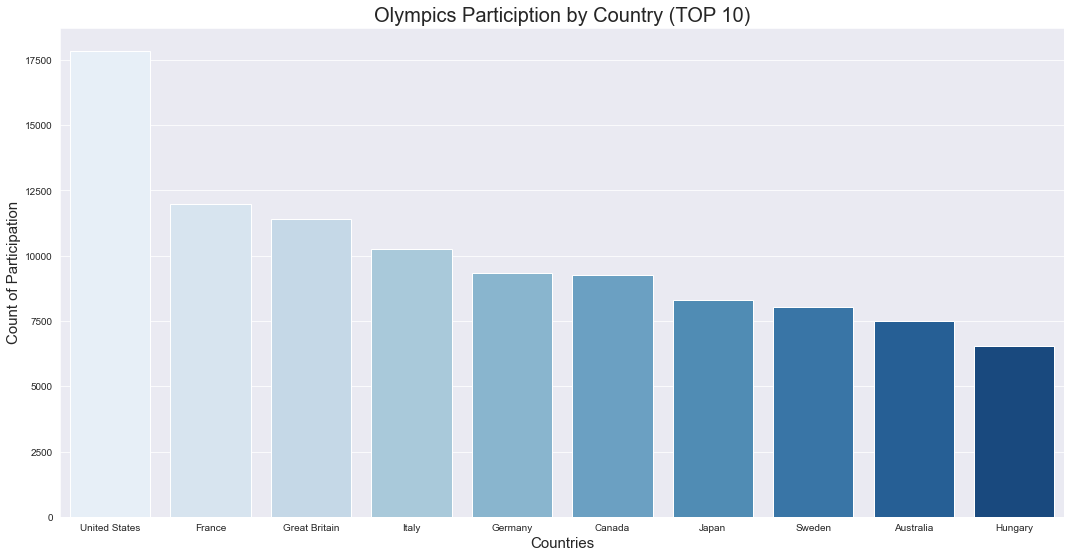

In [15]:
#Plot for the Top 10 countries based on participation
plt.figure(figsize = (18, 9))
sns.set_style('darkgrid')
bar = sns.barplot(x = top_10_countries.index, y = top_10_countries, palette = 'Blues')

plt.title("Olympics Particiption by Country (TOP 10)", size = 20)
bar.set_xlabel('Countries', size = 15)
bar.set_ylabel('Count of Participation', size = 15)

**Gained Insight:** Most of these countries have strong GDPs (gross domesic product). There might be a possible correlation between economy and participation, as well as population. The Top 10 countries with the greatest GDP are the US, China, Japan, Germany, India, UK, France, Brazil, Italy, and Canada. 7 out of 10 countries with the greatest GDPs in the world are present in the table above. Continued analysis could be done by pulling total population for all these countries as well.

**Question 2: What is the age distribution of Olympic athletes?**

Text(0, 0.5, 'Athlete Count')

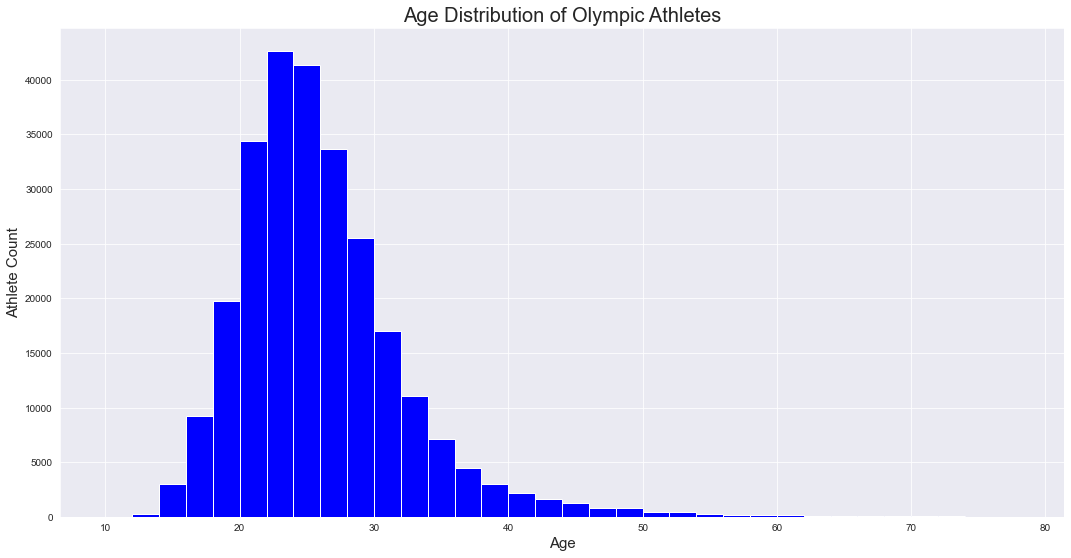

In [16]:
#Plot for the Age Distribution of athletes 
plt.figure(figsize = (18, 9))
plt.hist(merged_df['Age'], bins = np.arange(10, 80, 2), color = 'blue', edgecolor = 'white')

plt.title("Age Distribution of Olympic Athletes", size = 20)
plt.xlabel("Age", size = 15)
plt.ylabel("Athlete Count", size = 15)

**Gained Insight:** Majority of Olympic athletes are in their 20s and 30s. The number of Olympic athletes drop significantly around late 30s and 40s. <br>

**Question 3: What is the ratio of female and male participation in the Olympics?**

In [17]:
#Female and Male Participation Count
gender_cnt = merged_df['Sex'].value_counts()
gender_cnt

M    196374
F     74393
Name: Sex, dtype: int64

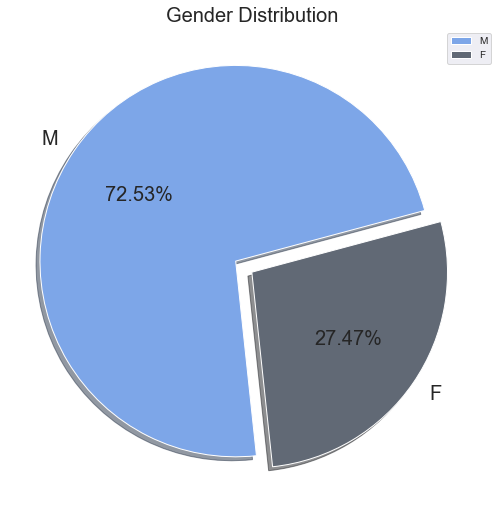

In [18]:
#Pie Chart for Female/Male Participation
plt.figure(figsize = (18, 9))
explode = [0.1, 0]
textprops = {'fontsize': 20}
color = ['#7da6e8', '#616975']
plt.pie(gender_cnt, labels = gender_cnt.index, startangle = 15, autopct = "%0.2f%%",
        shadow = True, explode = explode, textprops = textprops, colors = color)

plt.title("Gender Distribution", size = 20)
plt.legend()
plt.show()

**Gained Insight:** Looking at the pie chart, male participation is around 2.5x more than female participation for the Olympics. History of olympics show that male athletes are the predominate sex participating. Further question to ask is how has female participation changed over time - has it increased? decreased? stagnant?

**Question 4: What is the total number of Female athletes participating in each Summer olympics?**

In [19]:
#Total number of Female atheletes in each Summer olympics
female_athlete = merged_df.loc[(merged_df['Sex'] == 'F') & (merged_df['Season'] == 'Summer'), (['Sex', 'Year'])]
female_athlete = female_athlete.groupby('Year').count().reset_index()
female_athlete.head()

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


In [20]:
female_athlete.tail()

,Year,Sex
23,2000,5418
24,2004,5531
25,2008,5793
26,2012,5791
27,2016,6203


**Gained Insight:** There seems to be an upward trend in female participation in the Olympics as years pass by. Let's plot the number of female participation per year to visualize the trend.

**Question 5: How is Female participation throughout Olympic history?**

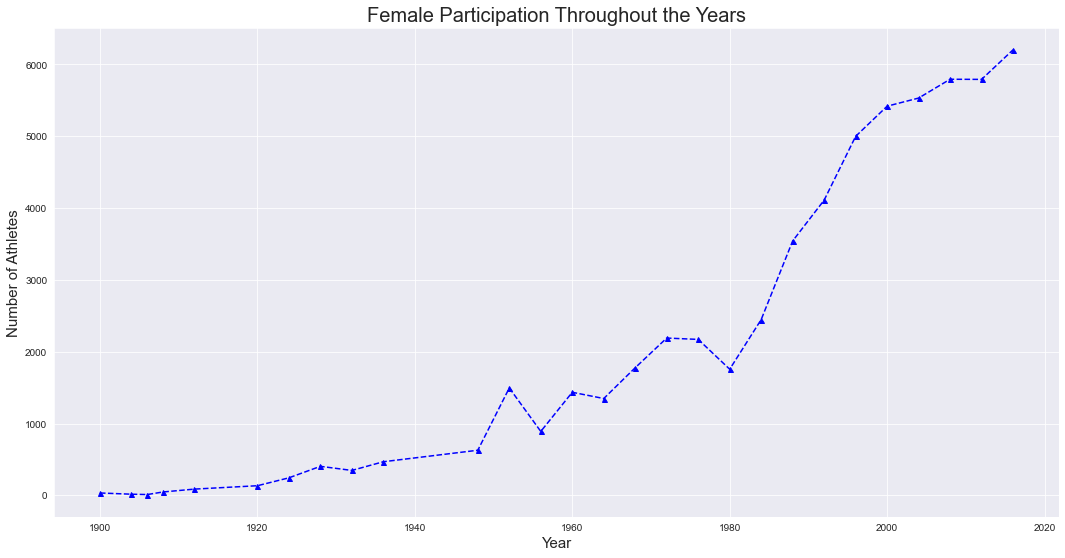

In [129]:
#Plot for Female participation throughout the years
plt.figure(figsize = (18,9))
plt.plot(female_athlete['Year'], female_athlete['Sex'], 'b^--', markersize = 5)

plt.title("Female Participation Throughout the Years", size = 20)
plt.xlabel("Year", size = 15)
plt.ylabel("Number of Athletes", size = 15)
plt.show()

**Gained Insight:** Looking at the line graph, from 1980s onward, female participation was on the rise (significant jump). It makes me wonder if there were any key events in the Feminist Movement during that time or what historical events occured during that decade to have such a tremendous increase of female atheletes in the Olympics. <br>

**Question 6:** What is the height/weight ratio of the Olympic athletes by sex?

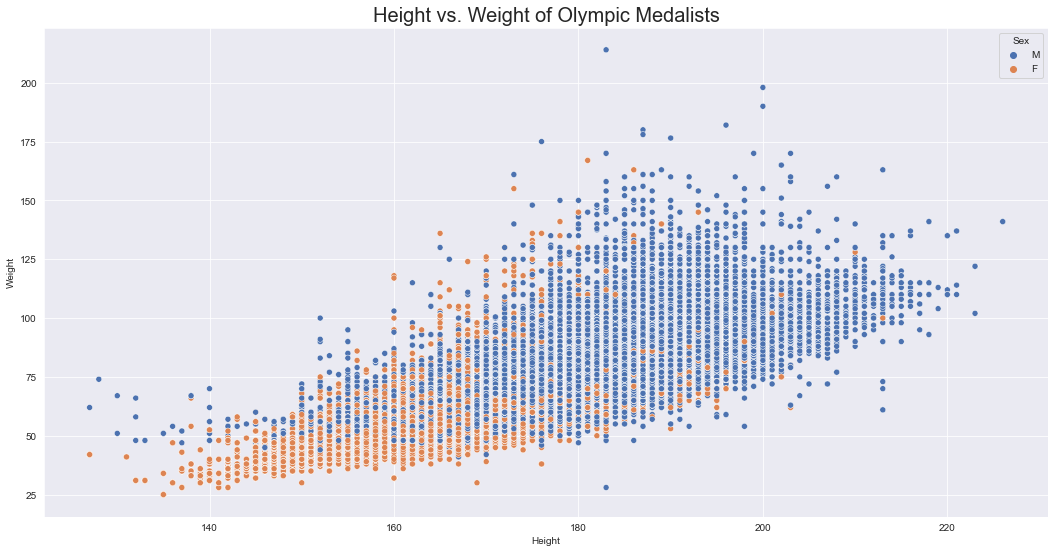

In [133]:
#Height vs. Weight Scatterplot
not_null_medals = merged_df.loc[(merged_df['Height'].notnull()) & (merged_df['Weight'].notnull())]

plt.figure(figsize = (18,9))
axis = sns.scatterplot(x = 'Height', y = 'Weight', data = not_null_medals, hue = 'Sex')
plt.title("Height vs. Weight of Olympic Medalists", size = 20)
plt.show()

**Gained Insight:** Although there are a few outliers, everything seems to be proportionate and makes sense. Female height and weight ratio is on the lower end compared to male athletes.